## Part 1: Preprocessing

In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [45]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [46]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition','Department']]
y_df.head()

,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


In [47]:
target_columns = [
    'Age',        
    'Education',
    'EducationField',
    'EnvironmentSatisfaction',
    'HourlyRate',
    'JobInvolvement',
    'JobLevel',
    'JobRole',   
    'NumCompaniesWorked',
    'OverTime',
    'PercentSalaryHike',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]



# Create X_df using your selected columns
X_df = attrition_df[target_columns]

# Show the data types for X_df
X_df.dtypes


Age                          int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [48]:
from sklearn.preprocessing import OneHotEncoder
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary
numerical_columns = X_df.select_dtypes(include=[np.int64, np.float64]).columns
categorical_columns = X_df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X_df[categorical_columns])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_df_encoded = X_df[numerical_columns].reset_index(drop=True)
X_df_encoded = pd.concat([X_df_encoded, X_encoded_df], axis=1)

c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_df_encoded, y_df, test_size=0.2, random_state=42)

In [50]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:

# Create a OneHotEncoder for the Department column
department_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder to the training data
department_encoder.fit(y_train[['Department']])

# Create two new variables by applying the encoder to the training and testing data
y_train_department_encoded = department_encoder.transform(y_train[['Department']])
y_test_department_encoded = department_encoder.transform(y_test[['Department']])



c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
# Create a OneHotEncoder for the Attrition column
attrition_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder to the training data
attrition_encoder.fit(y_train[['Attrition']])

# Create two new variables by applying the encoder to the training and testing data
y_train_attrition_encoded = attrition_encoder.transform(y_train[['Attrition']])
y_test_attrition_encoded = attrition_encoder.transform(y_test[['Attrition']])


c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Create, Compile, and Train the Model

In [53]:
# Find the number of columns in the X training data
column_len = X_train_scaled.shape[1]

# Create the input layer
input_layer = layers.Input(shape=(column_len,), name='input')

# Create shared layers
shared_layer1 = layers.Dense(64, activation='relu', name='shared1')(input_layer)
shared_layer2 = layers.Dense(32, activation='relu', name='shared2')(shared_layer1)

In [54]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
department_hidden_layer = layers.Dense(16, activation='relu', name='department_hidden')(shared_layer2)

# Create the output layer
department_output_layer = layers.Dense(y_train_department_encoded.shape[1], activation='softmax', name='department_output')(department_hidden_layer)






In [55]:
# Create a branch for Attrition with a hidden layer and an output layer

# Create the hidden layer
attrition_hidden_layer = layers.Dense(16, activation='relu', name='attrition_hidden')(shared_layer2)

# Create the output layer
attrition_output_layer = layers.Dense(y_train_attrition_encoded.shape[1], activation='softmax', name='attrition_output')(attrition_hidden_layer)



In [56]:
# Create the model
model = Model(inputs=input_layer, outputs=[department_output_layer, attrition_output_layer])

# Compile the model
model.compile(optimizer='adam', 
              loss={'department_output': 'categorical_crossentropy', 'attrition_output': 'categorical_crossentropy'},
              metrics={'department_output': 'accuracy', 'attrition_output': 'accuracy'})

# Summarize the model
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 32)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared1 (Dense)     │ (None, 64)        │      2,112 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared2 (Dense)     │ (None, 32)        │      2,080 │ shared1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department_hidden   │ (None, 16)        │        528 │ shared2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attrition_hidden    │ (None, 16)        │        528 │ shared2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department_output   │ (None, 2)         │         34 │ department_hidde… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attrition_output    │ (None, 1)         │         17 │ attrition_hidden… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,299 (20.70 KB)

 Trainable params: 5,299 (20.70 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
print(f'Shape of X_train_scaled: {X_train_scaled.shape}')


Shape of X_train_scaled: (1176, 32)


In [58]:
# Train the model
history = model.fit(
    X_train_scaled, 
    {'department_output': y_train_department_encoded, 'attrition_output': y_train_attrition_encoded},
    epochs=50,  
    batch_size=32,  
    validation_split=0.2  
)


Epoch 1/50


c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Keegan\anaconda3\envs\dev\lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - attrition_output_accuracy: 0.1737 - department_output_accuracy: 0.6355 - loss: 0.6455 - val_attrition_output_accuracy: 0.2034 - val_department_output_accuracy: 0.8051 - val_loss: 0.5129
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - attrition_output_accuracy: 0.1507 - department_output_accuracy: 0.7763 - loss: 0.5141 - val_attrition_output_accuracy: 0.2034 - val_department_output_accuracy: 0.8008 - val_loss: 0.4301
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - attrition_output_accuracy: 0.1703 - department_output_accuracy: 0.8207 - loss: 0.4152 - val_attrition_output_accuracy: 0.2034 - val_department_output_accuracy: 0.8602 - val_loss: 0.3386
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - attrition_output_accuracy: 0.1549 - department_output_accuracy: 0.8364 - loss: 0.3323 - val_attrition_output_accuracy: 0.2034 - val_department_output_accuracy: 0.8475 - val_loss: 0.2979
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - attriti

In [62]:
# Evaluate the model with the testing data
evaluation = model.evaluate(X_test_scaled, 
                            {'department_output': y_test_department_encoded, 'attrition_output': y_test_attrition_encoded})
print(f"Evaluation Results: {evaluation}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - attrition_output_accuracy: 0.1553 - department_output_accuracy: 0.8601 - loss: 1.5992 
Evaluation Results: [1.4543297290802002, 0.13265305757522583, 0.8605442047119141]


In [63]:
# Print the accuracy for both department and attrition
print(f"Department accuracy: {evaluation[1]}")
print(f"Attrition accuracy: {evaluation[2]}")

Department accuracy: 0.13265305757522583
Attrition accuracy: 0.8605442047119141


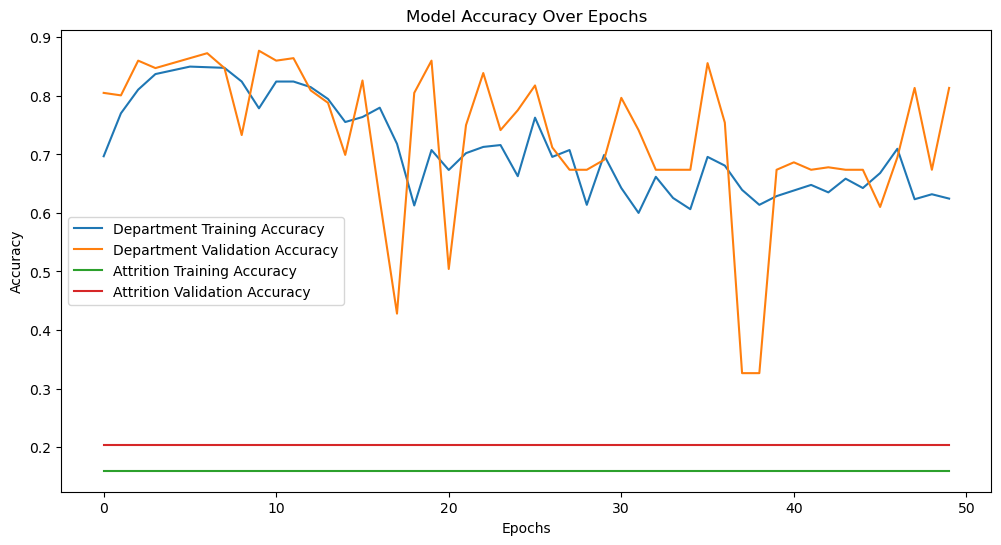

In [65]:
import matplotlib.pyplot as plt
# Plot the accuracy over each epoch
plt.figure(figsize=(12, 6))

# Department accuracy
plt.plot(history.history['department_output_accuracy'], label='Department Training Accuracy')
plt.plot(history.history['val_department_output_accuracy'], label='Department Validation Accuracy')

# Attrition accuracy
plt.plot(history.history['attrition_output_accuracy'], label='Attrition Training Accuracy')
plt.plot(history.history['val_attrition_output_accuracy'], label='Attrition Validation Accuracy')

plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1. 
2. 
3. 